In [71]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import preprocessing 
%matplotlib inline

In [72]:
df = pd.read_csv('garments_worker_productivity.csv')

In [73]:
#transform actual productivity to categorical data
tmp_condition = df['actual_productivity'] > 0.735091097
df.loc[tmp_condition, 'actual_productivity'] = 'Satisfactory'
df.loc[~tmp_condition, 'actual_productivity'] = 'Unsatisfactory'

In [74]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,Satisfactory
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,Satisfactory
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,Satisfactory
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,Satisfactory
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,Unsatisfactory
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,Unsatisfactory
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,Unsatisfactory
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,Unsatisfactory


In [75]:
# Convert the categorical data to Numerical data
df['quarter'].replace(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
                       [1, 2, 3, 4, 5], inplace=True)
df['day'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                        [1, 2, 3, 4, 5, 6, 7], inplace=True)
df['actual_productivity'].replace(['Satisfactory', 'Unsatisfactory'],
                       [1, 0,], inplace=True)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,1/1/2015,1,finishing,4,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,1
2,1/1/2015,1,sweing,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,1/1/2015,1,sweing,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,1/1/2015,1,sweing,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,3,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0
1193,3/11/2015,2,finishing,3,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0
1194,3/11/2015,2,finishing,3,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0
1195,3/11/2015,2,finishing,3,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0


In [76]:
# Next is the Normalization of the data to balance out the graph
#Use The min-max feature scaling method to normalize the data
# copy the data 
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
column1 = 'targeted_productivity'
df_min_max_scaled[column1] = (df_min_max_scaled[column1] - 
                             df_min_max_scaled[column1].min()) / (df_min_max_scaled[column1].max() - 
                                                                  df_min_max_scaled[column1].min()) 
      
# view normalized data 
display(df_min_max_scaled) 

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,4,8,1.000000,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,1/1/2015,1,finishing,4,1,0.931507,3.94,NaN,960,0,0.0,0,0,8.0,1
2,1/1/2015,1,sweing,4,11,1.000000,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,1/1/2015,1,sweing,4,12,1.000000,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,1/1/2015,1,sweing,4,6,1.000000,25.90,1170.0,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,3,10,0.931507,2.90,NaN,960,0,0.0,0,0,8.0,0
1193,3/11/2015,2,finishing,3,8,0.863014,3.90,NaN,960,0,0.0,0,0,8.0,0
1194,3/11/2015,2,finishing,3,7,0.794521,3.90,NaN,960,0,0.0,0,0,8.0,0
1195,3/11/2015,2,finishing,3,9,0.931507,2.90,NaN,1800,0,0.0,0,0,15.0,0


In [77]:
# put the dataset into a DataFrame
df_min_max_scaled = pd.DataFrame(df_min_max_scaled)
 
df_min_max_scaled

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,4,8,1.000000,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,1/1/2015,1,finishing,4,1,0.931507,3.94,NaN,960,0,0.0,0,0,8.0,1
2,1/1/2015,1,sweing,4,11,1.000000,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,1/1/2015,1,sweing,4,12,1.000000,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,1/1/2015,1,sweing,4,6,1.000000,25.90,1170.0,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,3,10,0.931507,2.90,NaN,960,0,0.0,0,0,8.0,0
1193,3/11/2015,2,finishing,3,8,0.863014,3.90,NaN,960,0,0.0,0,0,8.0,0
1194,3/11/2015,2,finishing,3,7,0.794521,3.90,NaN,960,0,0.0,0,0,8.0,0
1195,3/11/2015,2,finishing,3,9,0.931507,2.90,NaN,1800,0,0.0,0,0,15.0,0


In [78]:
# Remove unnecessary columns
df_min_max_scaled.drop(['department', 'date', 'wip', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change'], axis=1)

,quarter,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity
0,1,4,8,1.000000,26.16,7080,59.0,1
1,1,4,1,0.931507,3.94,960,8.0,1
2,1,4,11,1.000000,11.41,3660,30.5,1
3,1,4,12,1.000000,11.41,3660,30.5,1
4,1,4,6,1.000000,25.90,1920,56.0,1
...,...,...,...,...,...,...,...,...
1192,2,3,10,0.931507,2.90,960,8.0,0
1193,2,3,8,0.863014,3.90,960,8.0,0
1194,2,3,7,0.794521,3.90,960,8.0,0
1195,2,3,9,0.931507,2.90,1800,15.0,0


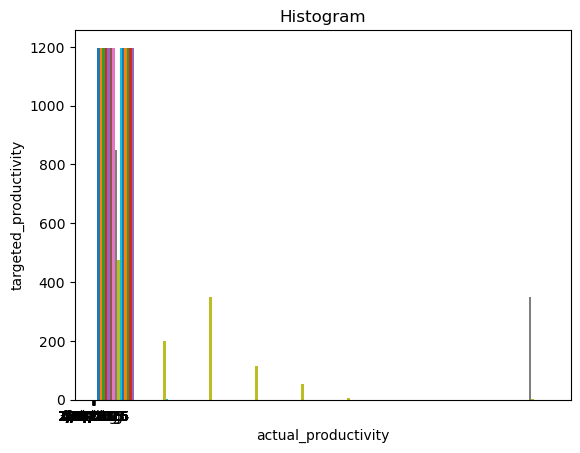

In [80]:
#Visualize the data

# Plotting a basic histogram
plt.hist(df_min_max_scaled)
 
# Adding labels and a title
plt.xlabel('actual_productivity')
plt.ylabel('targeted_productivity')
plt.title('Histogram')
 
# Display the plot
plt.show()

# Developing ANN from Scratch

In [12]:
def sigmoid(sum_func):
  return 1 / (1 + np.exp(-sum_func))

In [ ]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])